In [1]:
import random
import torch
from d2l import torch as d2l


In [3]:
token = d2l.tokenize(d2l.read_time_machine())

In [ ]:
token

In [7]:
corpus = [t  for line in token for t in line]
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

In [12]:
corpus[:10]

['the', 'time', 'machine', 'by', 'h', 'g', 'wells', 'i', 'the', 'time']

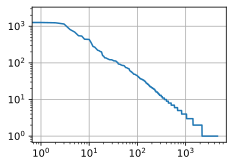

In [10]:
freqs = [freq  for toke,freq in vocab.token_freqs]
d2l.plot(freqs,xscale='log',yscale='log')

In [15]:
bigram_tokens =[pair for pair in zip(corpus[:-1],corpus[1:])]
b_vocab = d2l.Vocab(bigram_tokens)
b_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [14]:
trigram_tokens =[triple for triple in zip(corpus[:-2],corpus[1:-1],corpus[2:])]
t_vocab = d2l.Vocab(trigram_tokens )
t_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

In [16]:
b_freqs = [freq for freq in b_vocab.token_freqs]
t_freqs = [freq for freq in t_vocab.token_freqs]

In [20]:
from matplotlib import pyplot as plt
plt.plot([freqs,b_freqs ,t_freqs ],xscale='log',yscale='log')

In [44]:
def seq_data_iter_random(corpus, batch_size, num_steps):
    offset = random.randint(0, num_steps - 1)
    print(offset)
    corpus = corpus[offset:]
    num_subseqs = (len(corpus) - 1) // num_steps
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    random.shuffle(initial_indices)
    
    def data(pos):
        return corpus[pos: pos + num_steps]

    num_batches = num_subseqs // batch_size
    for i in range(0, batch_size * num_batches, batch_size):
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

In [47]:
my_seq = list(range(35))
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

2
X:  tensor([[ 7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16]]) 
Y: tensor([[ 8,  9, 10, 11, 12],
        [13, 14, 15, 16, 17]])
X:  tensor([[17, 18, 19, 20, 21],
        [ 2,  3,  4,  5,  6]]) 
Y: tensor([[18, 19, 20, 21, 22],
        [ 3,  4,  5,  6,  7]])
X:  tensor([[27, 28, 29, 30, 31],
        [22, 23, 24, 25, 26]]) 
Y: tensor([[28, 29, 30, 31, 32],
        [23, 24, 25, 26, 27]])


In [42]:
def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [43]:
for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X: ', X, '\nY:', Y)

X:  tensor([[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]) 
Y: tensor([[11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20]])
X:  tensor([[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]) 
Y: tensor([[21, 22, 23, 24, 25],
        [26, 27, 28, 29, 30]])
X:  tensor([[5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4]]) 
Y: tensor([[ 6,  7,  8,  9, 10],
        [ 1,  2,  3,  4,  5]])
